Image Anonymization techniques

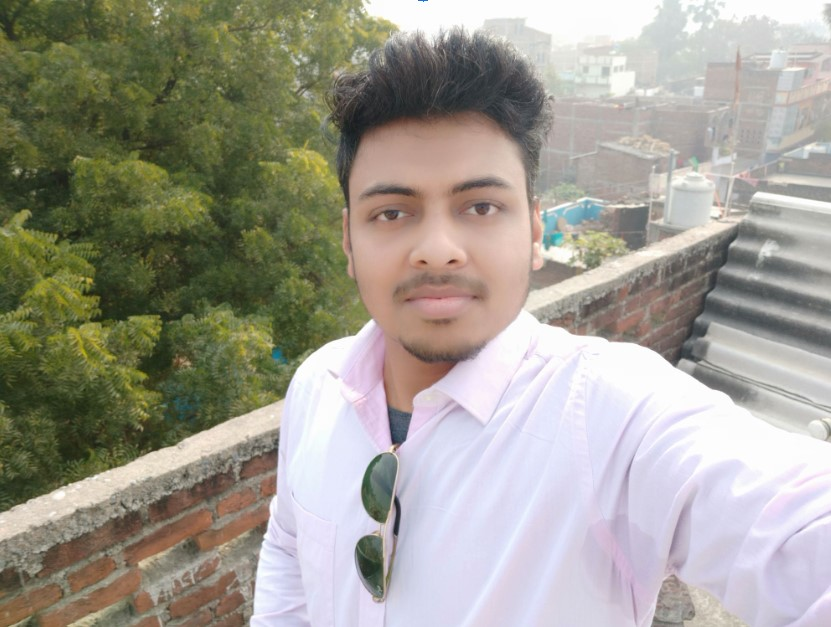

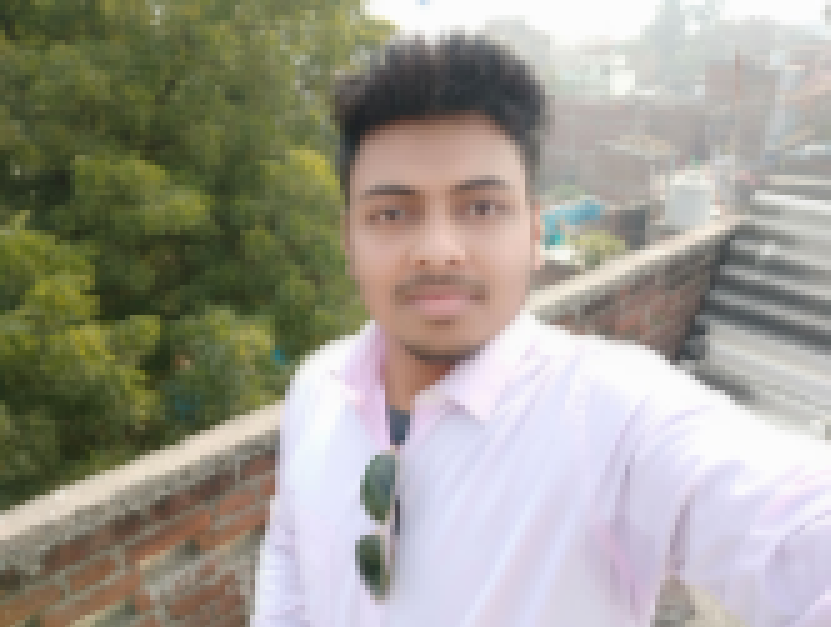

True

In [6]:
# Import necessary libraries
import cv2
from google.colab.patches import cv2_imshow

# Load the input image
image = cv2.imread("input_image.jpg")
cv2_imshow(image)
# Define the pixelation block size
block_size = 5

# Get the image dimensions
(h, w) = image.shape[:2]

# Loop over the image in blocks and apply pixelation
for y in range(0, h, block_size):
  for x in range(0, w, block_size):
    roi = image[y:y+block_size, x:x+block_size]
    (B, G, R) = [int(x) for x in cv2.mean(roi)[:3]]
    cv2.rectangle(image, (x, y), (x+block_size, y+block_size), (B, G, R), -1)

# Display the anonymized image
cv2_imshow(image)

# Save the anonymized image
cv2.imwrite("anonymized_image.jpg", image)

In this code, we first load the input image using cv2.imread(). Then, we define the kernel size for the Gaussian blur filter using kernel_size. We apply the Gaussian blur filter to the input image using cv2.GaussianBlur(), which produces the anonymized image. Finally, we display the anonymized image using cv2_imshow() and save it to a file using cv2.imwrite().

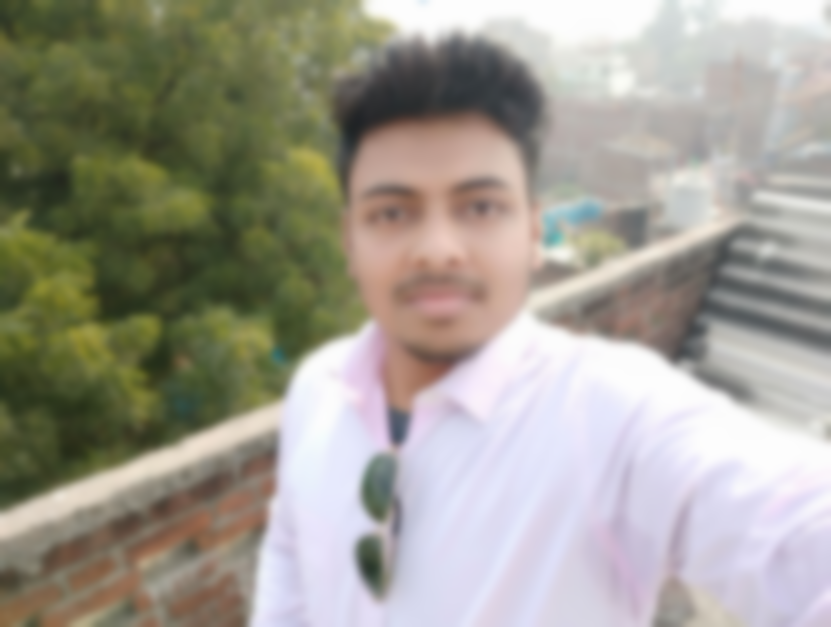

True

In [7]:
import cv2
from google.colab.patches import cv2_imshow

# Load the input image
image = cv2.imread("input_image.jpg")

# Define the Gaussian blur kernel size
kernel_size = (25, 25)

# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(image, kernel_size, 0)

# Display the anonymized image
cv2_imshow(blurred_image)

# Save the anonymized image
cv2.imwrite("anonymized_image.jpg", blurred_image)

In this code, we first load the input image using cv2.imread(). Then, we define the number of pixels to perturb using num_pixels. We randomly select num_pixels pixel coordinates using np.random.randint(). We perturb the color of the selected pixels by assigning a random RGB value using np.random.randint(). Finally, we display the anonymized image using cv2_imshow() and save it to a file using cv2.imwrite().

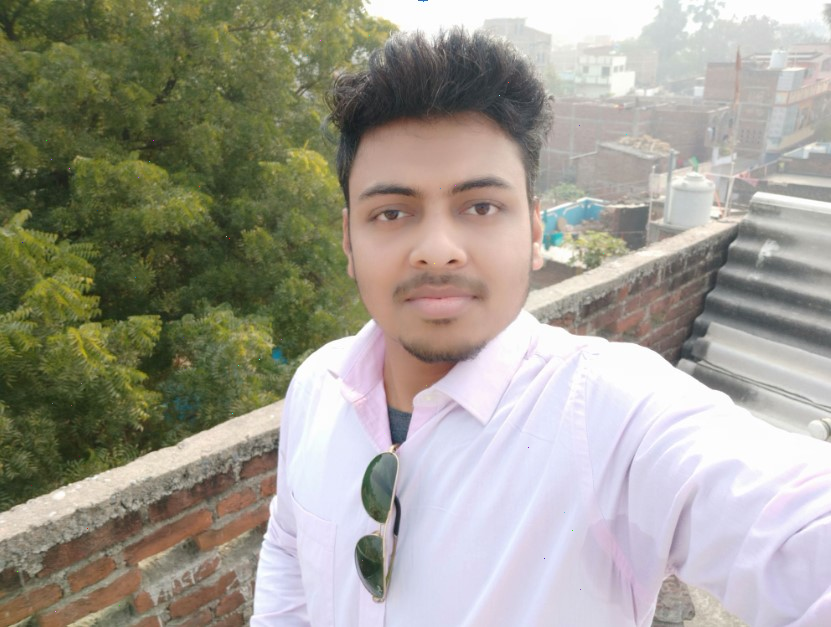

True

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
image = cv2.imread("input_image.jpg")

# Define the number of pixels to perturb
num_pixels = 50

# Randomly select pixel coordinates to perturb
coords = np.random.randint(0, image.shape[0], size=(num_pixels, 2))

# Perturb the selected pixels
for coord in coords:
  image[coord[0], coord[1]] = np.random.randint(0, 256, size=3)

# Display the anonymized image
cv2_imshow(image)

# Save the anonymized image
cv2.imwrite("anonymized_image.jpg", image)

# Video Data
Here is an example code that performs anonymization on video data using the same Gaussian blur technique as before:

In [ ]:
# Import necessary libraries
import cv2
from google.colab.patches import cv2_imshow

# Load the input video
video = cv2.VideoCapture("input_video.mp4")

# Get the video frame dimensions
frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the Gaussian blur kernel size
kernel_size = (25, 25)

# Define the output video codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*"MP4V")
output_video = cv2.VideoWriter("anonymized_video.mp4", fourcc, 30, (frame_width, frame_height))

# Process each frame of the input video
while True:
  # Read a frame from the input video
  ret, frame = video.read()
  
  # If there are no more frames, break out of the loop
  if not ret:
    break
  
  # Apply Gaussian blur to the frame
  blurred_frame = cv2.GaussianBlur(frame, kernel_size, 0)
  
  # Display the anonymized frame
  #cv2_imshow(blurred_frame)
  
  # Write the anonymized frame to the output video
  output_video.write(blurred_frame)

# Release the input and output video objects
video.release()
output_video.release()

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input video
input_video = cv2.VideoCapture("input_video.mp4")

# Define the number of pixels to perturb
num_pixels = 50

# Define the output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter('anonymized_video.mp4', fourcc, input_video.get(cv2.CAP_PROP_FPS), (int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(input_video.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# Loop through the frames of the input video
while True:
    # Read the next frame of the input video
    ret, frame = input_video.read()

    # If there are no more frames, break out of the loop
    if not ret:
        break

    # Randomly select pixel coordinates to perturb
    coords = np.random.randint(0, frame.shape[0], size=(num_pixels, 2))

    # Perturb the selected pixels
    for coord in coords:
        frame[coord[0], coord[1]] = np.random.randint(0, 256, size=3)

    # Write the anonymized frame to the output video
    output_video.write(frame)

    # Display the anonymized frame
    #cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
            break
